# Data Set Up

Libraries importation

In [616]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Set the Record Count

In [617]:
np.random.seed(42)
n_students=100

Generation the input features (X)

In [618]:
study_hours=np.round(np.random.uniform(0,10,n_students),1)
attendance=np.random.randint(50, 100, n_students)
previous_grade=np.random.randint(0,100,n_students)

Creating the Target Variable

In [619]:
noise=np.random.normal(loc=0, scale=4, size=n_students)
weighted_score=(study_hours*5)+(attendance*0.3)+(previous_grade*0.2)

Final Grade

In [620]:
final_grade=np.clip(weighted_score+noise, 0,100).astype(int)

# Creating the data frame

In [621]:
data=pd.DataFrame({
    "study_hours":study_hours,
    "attendance": attendance,
    "previous_grade":previous_grade,
    "final_grade":final_grade
    })
print(data.head())
data.describe()

   study_hours  attendance  previous_grade  final_grade
0          3.7          81              18           46
1          9.5          88              89           91
2          7.3          98              66           78
3          6.0          81              18           60
4          1.6          53              19           25


,study_hours,attendance,previous_grade,final_grade
count,100.000000,100.000000,100.000000,100.00000
mean,4.703000,74.400000,46.820000,55.36000
std,2.974316,14.760718,29.933387,18.11106
min,0.100000,50.000000,0.000000,13.00000
25%,1.950000,60.750000,20.750000,43.00000
50%,4.650000,77.000000,40.500000,53.50000
75%,7.300000,86.000000,70.250000,69.00000
max,9.900000,98.000000,99.000000,100.00000


In [622]:
print(data.corr(),"\n")
pd.set_option('display.max_rows', None)
print(data)

                study_hours  attendance  previous_grade  final_grade
study_hours        1.000000    0.120831        0.083361     0.876702
attendance         0.120831    1.000000        0.058484     0.395702
previous_grade     0.083361    0.058484        1.000000     0.399801
final_grade        0.876702    0.395702        0.399801     1.000000 

    study_hours  attendance  previous_grade  final_grade
0           3.7          81              18           46
1           9.5          88              89           91
2           7.3          98              66           78
3           6.0          81              18           60
4           1.6          53              19           25
5           1.6          79              95           53
6           0.6          86              70           46
7           8.7          72              51           73
8           6.0          88              32           59
9           7.1          94              39           69
10          0.2          6

Correlation Visualisation

<Axes: >

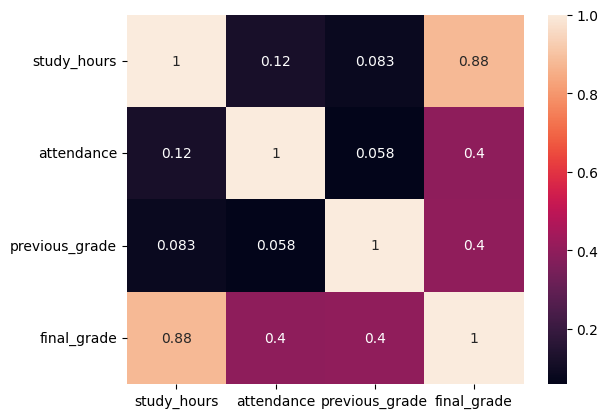

In [623]:
sns.heatmap(data.corr(), annot=True)

# Building the model

In [624]:
X=data.drop('final_grade',axis=1)
Y=data['final_grade']

In [625]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=0)

Train The Model

In [626]:
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

# Making Predictions

In [627]:
Y_pred=model.predict(X_test)
r2=r2_score(Y_test,Y_pred)

In [628]:
print(f"Model accuracy(R2 score){r2*100:.2f}%")

Model accuracy(R2 score)81.22%


# Visualisation

In [629]:
prediction_df=pd.DataFrame({
    "Actual Grade": Y_test.values,
    "Predicted Grade": Y_pred
})
print('Actual vs. Predicted Grades')
print(prediction_df.head())

Actual vs. Predicted Grades
   Actual Grade  Predicted Grade
0            49            48.68
1            66            62.78
2            78            71.67
3            80            74.23
4            78            65.48


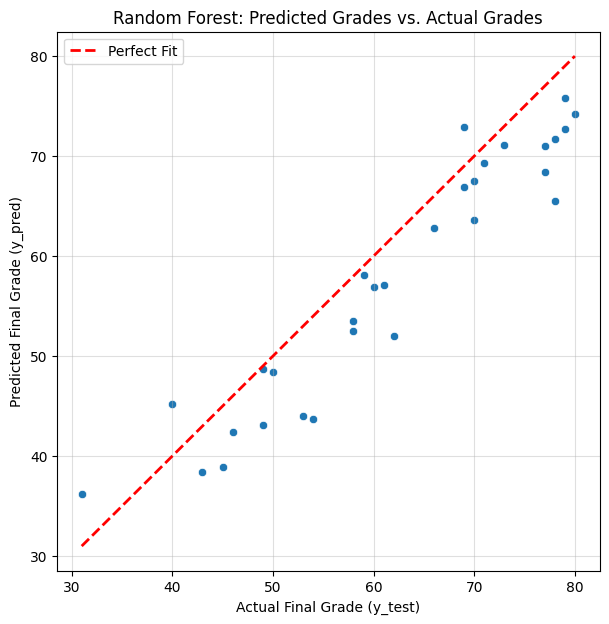

In [633]:
plt.figure(figsize=(7, 7))

sns.scatterplot(x='Actual Grade', y='Predicted Grade', data=prediction_df)
plt.title('Random Forest: Predicted Grades vs. Actual Grades')
plt.xlabel('Actual Final Grade (y_test)')

min_val = min(prediction_df['Actual Grade'].min(), prediction_df['Predicted Grade'].min())
max_val = max(prediction_df['Actual Grade'].max(), prediction_df['Predicted Grade'].max())

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.ylabel('Predicted Final Grade (y_pred)')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()